In [1]:
import pandas as pd

In [2]:
birddata = pd.read_csv("C:\\Users\\Ani\\Downloads\\bird_tracking.csv")
birddata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61920 entries, 0 to 61919
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          61920 non-null  int64  
 1   altitude            61920 non-null  int64  
 2   date_time           61920 non-null  object 
 3   device_info_serial  61920 non-null  int64  
 4   direction           61477 non-null  float64
 5   latitude            61920 non-null  float64
 6   longitude           61920 non-null  float64
 7   speed_2d            61477 non-null  float64
 8   bird_name           61920 non-null  object 
dtypes: float64(4), int64(3), object(2)
memory usage: 4.3+ MB


In [3]:
birddata.head()

,Unnamed: 0,altitude,date_time,device_info_serial,direction,latitude,longitude,speed_2d,bird_name
0,0,71,2013-08-15 00:18:08+00,851,-150.469753,49.419860,2.120733,0.150000,Eric
1,1,68,2013-08-15 00:48:07+00,851,-136.151141,49.419880,2.120746,2.438360,Eric
2,2,68,2013-08-15 01:17:58+00,851,160.797477,49.420310,2.120885,0.596657,Eric
3,3,73,2013-08-15 01:47:51+00,851,32.769360,49.420359,2.120859,0.310161,Eric
4,4,69,2013-08-15 02:17:42+00,851,45.191230,49.420331,2.120887,0.193132,Eric


In [4]:
import matplotlib.pyplot as plt
import numpy as np

In [5]:
ix = birddata.bird_name == "Eric"

In [6]:
x, y = (birddata.longitude[ix], birddata.latitude[ix])

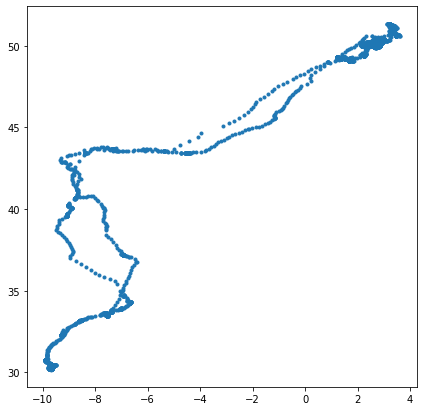

In [7]:
plt.figure(figsize=(7,7))
plt.plot(x, y, ".");
plt.savefig("trajectory.pdf")

In [8]:
bird_names = pd.unique(birddata.bird_name)

In [9]:
bird_names

array(['Eric', 'Nico', 'Sanne'], dtype=object)

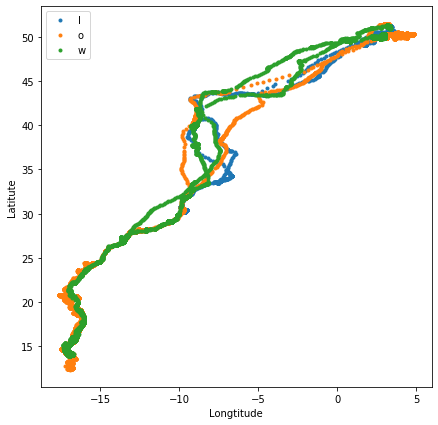

In [10]:
plt.figure(figsize=(7,7))
for bird_name in bird_names:
    ix = birddata.bird_name == bird_name
    x, y = (birddata.longitude[ix], birddata.latitude[ix])
    plt.plot(x, y, ".", label= bird_name)
plt.xlabel("Longtitude")
plt.ylabel("Latitute")
plt.legend("lower right");
plt.savefig("3traj.pdf")

In [11]:
ix = birddata.bird_name == "Eric"

In [12]:
speed = birddata.speed_2d[ix]

C:\Users\Ani\anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Ani\anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


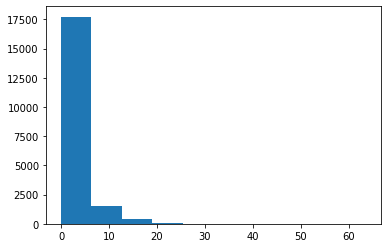

In [13]:
plt.hist(speed);

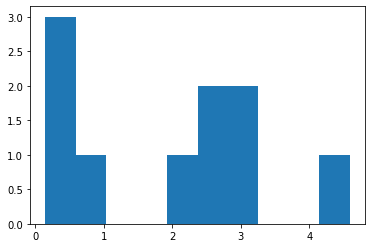

In [14]:
plt.hist(speed[:10]);

In [15]:
np.isnan(speed).any()

True

In [16]:
#This will count True as 1 and False as 0 and sum up  all of them
np.sum(np.isnan(speed))

85

In [17]:
ind = np.isnan(speed)

In [18]:
ind

0        False
1        False
2        False
3        False
4        False
         ...  
19790    False
19791    False
19792    False
19793    False
19794    False
Name: speed_2d, Length: 19795, dtype: bool

In [19]:
~ind

0        True
1        True
2        True
3        True
4        True
         ... 
19790    True
19791    True
19792    True
19793    True
19794    True
Name: speed_2d, Length: 19795, dtype: bool

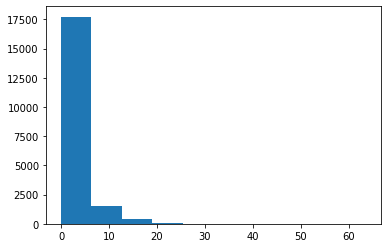

In [20]:
ind = np.isnan(speed)
plt.hist(speed[~ind]);
plt.savefig('hist.pdf')

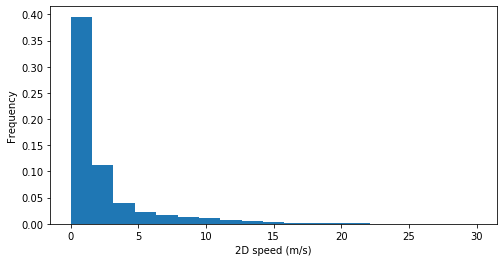

In [21]:
plt.figure(figsize=(8,4))
ind = np.isnan(speed)
plt.hist(speed[~ind], bins= np.linspace(0,30,20), density=True);
plt.xlabel("2D speed (m/s)")
plt.ylabel("Frequency");
#plt.savefig('hist.pdf')

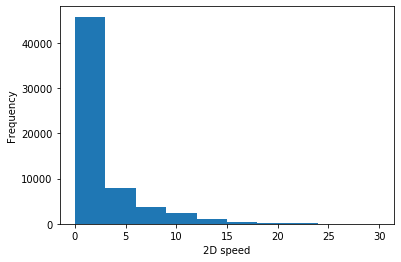

In [22]:
birddata.speed_2d.plot(kind='hist', range=[0,30])
plt.xlabel("2D speed");
plt.savefig("pd_hist.pdf")

In [23]:
birddata.date_time[:5]

0    2013-08-15 00:18:08+00
1    2013-08-15 00:48:07+00
2    2013-08-15 01:17:58+00
3    2013-08-15 01:47:51+00
4    2013-08-15 02:17:42+00
Name: date_time, dtype: object

In [24]:
import datetime

In [25]:
datetime.datetime.today()

datetime.datetime(2020, 4, 30, 0, 19, 47, 856121)

In [26]:
time_1 = datetime.datetime.today()
time_2 = datetime.datetime.today()

In [27]:
time_2 - time_1

datetime.timedelta(0)

In [28]:
date_str = birddata.date_time[0]
date_str[:-3]

'2013-08-15 00:18:08'

In [29]:
datetime.datetime.strptime(date_str[:-3], '%Y-%m-%d %H:%M:%S')

datetime.datetime(2013, 8, 15, 0, 18, 8)

In [30]:
timestamps = []
for k in range(0,len(birddata)):
    timestamps.append(datetime.datetime.strptime(birddata.date_time.iloc[k][:-3], '%Y-%m-%d %H:%M:%S'))

In [31]:
timestamps[:5]

[datetime.datetime(2013, 8, 15, 0, 18, 8),
 datetime.datetime(2013, 8, 15, 0, 48, 7),
 datetime.datetime(2013, 8, 15, 1, 17, 58),
 datetime.datetime(2013, 8, 15, 1, 47, 51),
 datetime.datetime(2013, 8, 15, 2, 17, 42)]

In [32]:
birddata["timestamp"] = pd.Series(timestamps, index = birddata.index)

In [33]:
birddata.head()

,Unnamed: 0,altitude,date_time,device_info_serial,direction,latitude,longitude,speed_2d,bird_name,timestamp
0,0,71,2013-08-15 00:18:08+00,851,-150.469753,49.419860,2.120733,0.150000,Eric,2013-08-15 00:18:08
1,1,68,2013-08-15 00:48:07+00,851,-136.151141,49.419880,2.120746,2.438360,Eric,2013-08-15 00:48:07
2,2,68,2013-08-15 01:17:58+00,851,160.797477,49.420310,2.120885,0.596657,Eric,2013-08-15 01:17:58
3,3,73,2013-08-15 01:47:51+00,851,32.769360,49.420359,2.120859,0.310161,Eric,2013-08-15 01:47:51
4,4,69,2013-08-15 02:17:42+00,851,45.191230,49.420331,2.120887,0.193132,Eric,2013-08-15 02:17:42


In [34]:
birddata.timestamp[4]-birddata.timestamp[3]

Timedelta('0 days 00:29:51')

In [35]:
times = birddata.timestamp[birddata.bird_name == "Eric"]
elapsed_time = [time - times[0] for time in times]

In [36]:
elapsed_time[:5]

[Timedelta('0 days 00:00:00'),
 Timedelta('0 days 00:29:59'),
 Timedelta('0 days 00:59:50'),
 Timedelta('0 days 01:29:43'),
 Timedelta('0 days 01:59:34')]

In [37]:
elapsed_time[1000]/ datetime.timedelta(days=1)

12.084722222222222

In [38]:
elapsed_time[1000]/ datetime.timedelta(hours=1)

290.03333333333336

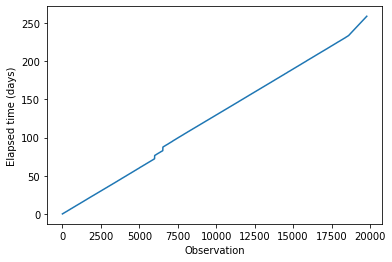

In [39]:
plt.plot(np.array(elapsed_time)/ datetime.timedelta(days=1))
plt.xlabel("Observation")
plt.ylabel("Elapsed time (days)");
plt.savefig("timeplot.pdf")

In [43]:
data = birddata[birddata.bird_name == "Eric"]
times = data.timestamp
elapsed_time = [time - times[0] for time in times]
elapsed_days = np.array(elapsed_time)/ datetime.timedelta(days=1)
next_day = 1
inds = []
daily_mean_speed = []
for i,t in enumerate(elapsed_days):
    if t < next_day:
        inds.append(i)
    else:
        daily_mean_speed.append(np.mean(data.speed_2d[inds]))
        next_day += 1
        inds = []

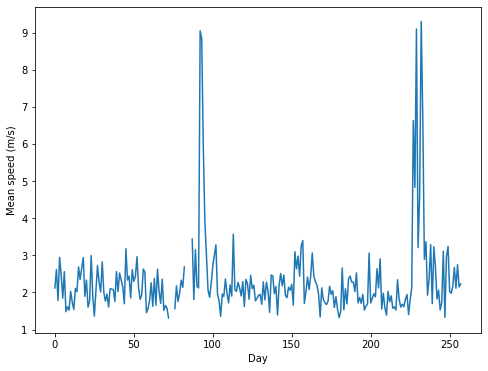

In [41]:
plt.figure(figsize=(8,6))
plt.plot(daily_mean_speed)
plt.xlabel("Day")
plt.ylabel("Mean speed (m/s)");
plt.savefig("dms.pdf")

In [42]:
# Which is the earliest recorded timestamp in the dataset for Sanne?
x = birddata.timestamp[birddata.bird_name == "Sanne"]
x[:1]

40916   2013-08-15 00:01:08
Name: timestamp, dtype: datetime64[ns]